# Cuisine Classifier: Data Visualization
This notebook details the steps taken to conduct an exploratory data analysis and visualization of the Yummly dataset. This is the first part of my final machine learning project in classifying cuisines given the ingredients to a recipe.

In [1]:
#Import the following libraries to assist in conducting analysis and creating visualizations:

import numpy as np 
import pandas as pd 
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
#Start reading data and get an overview of what's in each dataset:

train = pd.read_json('train.json', orient='columns')
test = pd.read_json('test.json', orient='columns')

In [3]:
df_train = train
df_test = test

In [4]:
df_train

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."
...,...,...,...
39769,29109,irish,"[light brown sugar, granulated sugar, butter, ..."
39770,11462,italian,"[KRAFT Zesty Italian Dressing, purple onion, b..."
39771,2238,irish,"[eggs, citrus fruit, raisins, sourdough starte..."
39772,41882,chinese,"[boneless chicken skinless thigh, minced garli..."


In [5]:
df_test

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."
...,...,...
9939,30246,"[large egg yolks, fresh lemon juice, sugar, bo..."
9940,36028,"[hot sauce, butter, sweet potatoes, adobo sauc..."
9941,22339,"[black pepper, salt, parmigiano reggiano chees..."
9942,42525,"[cheddar cheese, cayenne, paprika, plum tomato..."


In [6]:
#Check for missing data:

print('Train missing data:')
print(df_train.isnull().sum())

Train missing data:
id             0
cuisine        0
ingredients    0
dtype: int64


In [7]:
print('Test missing data:')
print(df_test.isnull().sum())

Test missing data:
id             0
ingredients    0
dtype: int64


In [8]:
#Check data types:

df_train.dtypes

id              int64
cuisine        object
ingredients    object
dtype: object

In [9]:
df_test.dtypes

id              int64
ingredients    object
dtype: object

In [10]:
#See what kinds of cuisines are in the dataset:

df_train["cuisine"].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [11]:
#Obtain count of each cuisine to see how many recipes are represented:

df_train["cuisine"].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

Text(0.5, 1.0, 'Number of Recipes by Cuisine')

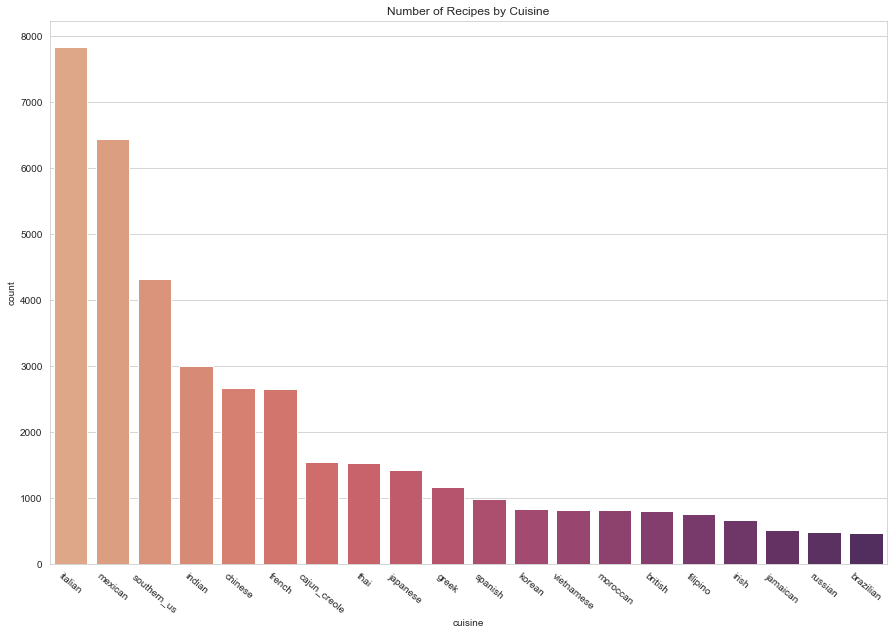

In [12]:
#Create visualization to represent the cuisine counts:

plt.figure(figsize=(15,10))
sns.countplot(x='cuisine', palette='flare',data=df_train, order = train.cuisine.value_counts(ascending=False).index) 
plt.xticks(rotation=-40)
plt.title('Number of Recipes by Cuisine')

From counting the number of recipes represented and visualizing it in a bar graph, we can see that Italian cuisine is well represented in the dataset. This could indicate its popularity or its mere abundance of recipes that are available. The perspective from which this dataset was compiled and collected could also serve as an explanation. As Yummly is based in the United States, it may be reflecting American tastes and choices in cuisine.

In [13]:
#Import counter to assist with analyzing ingredients portion of dataset:

from collections import Counter

In [14]:
#Get overview of ingredients:

df_train['ingredients']

0        [romaine lettuce, black olives, grape tomatoes...
1        [plain flour, ground pepper, salt, tomatoes, g...
2        [eggs, pepper, salt, mayonaise, cooking oil, g...
3                      [water, vegetable oil, wheat, salt]
4        [black pepper, shallots, cornflour, cayenne pe...
                               ...                        
39769    [light brown sugar, granulated sugar, butter, ...
39770    [KRAFT Zesty Italian Dressing, purple onion, b...
39771    [eggs, citrus fruit, raisins, sourdough starte...
39772    [boneless chicken skinless thigh, minced garli...
39773    [green chile, jalapeno chilies, onions, ground...
Name: ingredients, Length: 39774, dtype: object

In [15]:
#Prepare to count each individual ingredient:

ingredients_individual = Counter([ingredient for ingredient_list in train.ingredients for ingredient in ingredient_list])
ingredients_individual = pd.DataFrame.from_dict(ingredients_individual,orient='index').reset_index()

In [16]:
ingredients_individual = ingredients_individual.rename(columns={'index':'Ingredient', 0:'Count'})

In [17]:
ingredients_individual.sort_values('Count', ascending = False)['Count'].describe()

count     6714.000000
mean        63.788353
std        388.355948
min          1.000000
25%          1.000000
50%          4.000000
75%         20.000000
max      18049.000000
Name: Count, dtype: float64

In [18]:
print(ingredients_individual)

                                             Ingredient  Count
0                                       romaine lettuce    270
1                                          black olives    229
2                                        grape tomatoes    228
3                                                garlic   7380
4                                                pepper   4438
...                                                 ...    ...
6709         Lipton® Iced Tea Brew Family Size Tea Bags      1
6710  Hidden Valley® Greek Yogurt Original Ranch® Di...      1
6711                                          lop chong      1
6712                          tomato garlic pasta sauce      1
6713                            crushed cheese crackers      1

[6714 rows x 2 columns]


We see that 6,714 unique ingredients are represented in the dataset.

Text(0.5, 1.0, 'Count of Top 20 Ingredients')

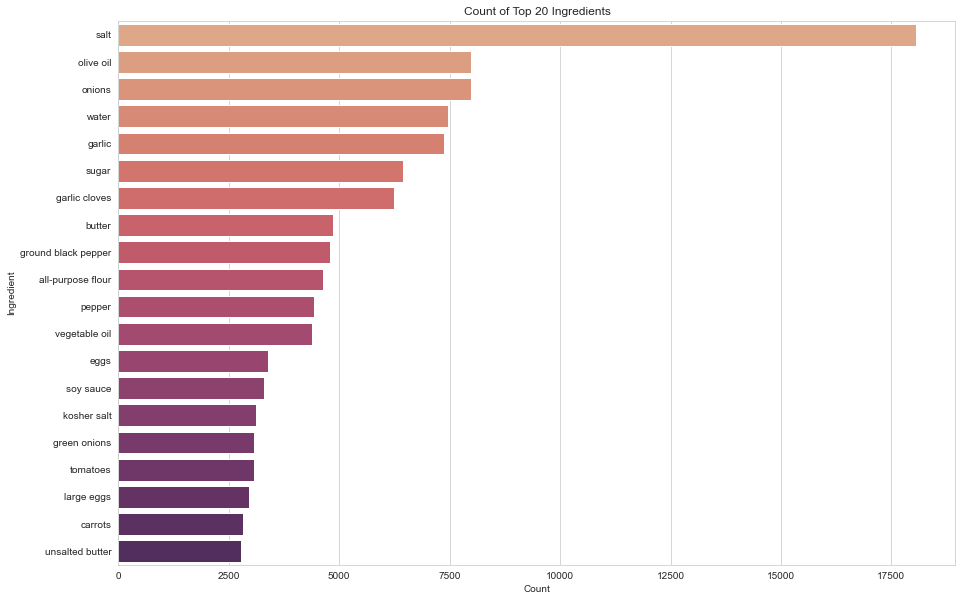

In [19]:
#Create visualization to see most represented ingredients:

f, ax = plt.subplots(figsize=(15,10))
sns.barplot(x = 'Count', 
            y = 'Ingredient',
            palette='flare',
            data = ingredients_individual.sort_values('Count', ascending=False).head(20))
plt.title('Count of Top 20 Ingredients')

By obtaining the top 20 ingredients, we can see that salt is the most common ingredient. It is also interesting to note that these commonly used ingredients are ones that can be found in almost all cuisines, indicating its universality and how it is not constrained by boundaries. The only exception to this would be soy sauce, which is mainly an Asian ingredient.

Text(0.5, 1.0, 'Average Number of Ingredients by Cuisine')

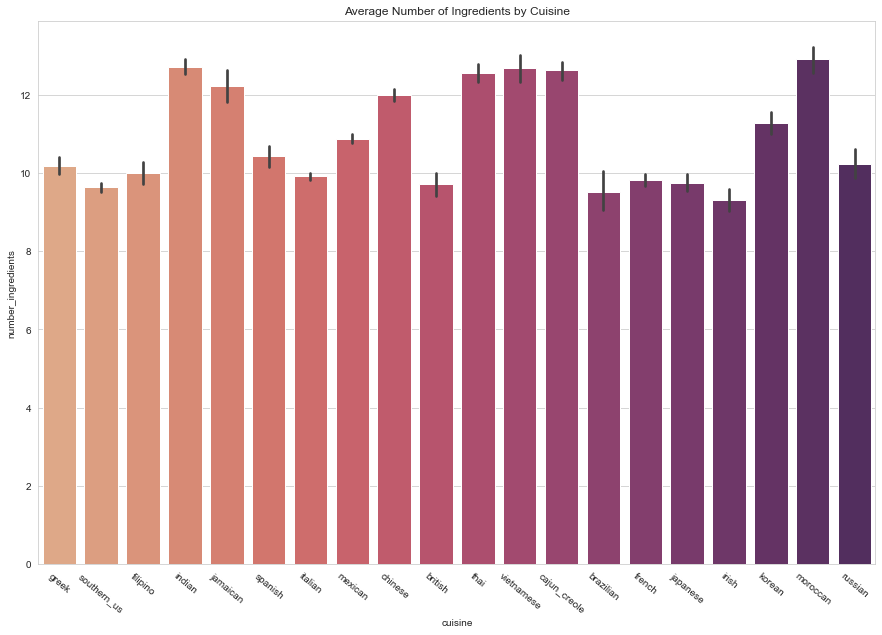

In [20]:
#Create visualization to see average number of ingredients in a recipe by cuisine:

plt.figure(figsize=(15,10))
sns.barplot(x='cuisine',
            y='number_ingredients',
            palette='flare',
            data= (pd.concat([train.cuisine,train.ingredients.map(lambda l: len(l))], axis=1)
                    .rename(columns={'ingredients':'number_ingredients'}))
            )
plt.xticks(rotation=-40)
plt.title('Average Number of Ingredients by Cuisine')

Tying it together, my last visualization aimed to explore the average number of ingredients in a recipe by each cuisine. The cuisines that had on average over 12 ingredients in a recipe were Indian, Jamaican, Thai, Vietnamese, Cajun-Creole, and Moroccan. These cuisines typically include many spices, which may have attributed to higher average ingredient counts compared to other cuisines.